In [14]:
#importing all necessary libaries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from PIL import ImageTk, Image
import PIL
import tkinter
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.filedialog import askopenfile
import os

In [15]:
#Edge Mapping Conversion

def MorphologyEX_Gradient(image):
    #blurs the image
    blur = cv2.GaussianBlur(image,(5,5),0)
    kernel = np.ones((5,5),np.uint8)
    #binarizes the image according to the threshold
    ret, thresh = cv2.threshold(blur, 190,255,cv2.THRESH_BINARY_INV)

    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    #increases the kernel size to remove any empty spaces within the lego brick
    kernel = np.ones((10,10),np.uint8)
    #removes any noise within the objects (dilation, erosion)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    #gradients (erosion - dilation)
    gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
    
    return gradient;

#We are using Canny Edge Map
def CannyEdge(image, threshVal = 90):
    ret, thresh = cv2.threshold(image, threshVal ,255,cv2.THRESH_BINARY_INV) #converts to a binary image based on threshold
    canny = cv2.Canny(thresh,10,70)
    return canny;

def Sobel(image):
    ret, thresh = cv2.threshold(image, 190,255,cv2.THRESH_BINARY_INV)
    sobelx = cv2.Sobel(thresh, cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(thresh, cv2.CV_8U,0,1,ksize=3)
    imgSobel = sobelx + sobely
    return imgSobel

In [16]:
#gets the image
path = 'C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/Eye.png'
#path = 'C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/round-circles.jpg' #basic test

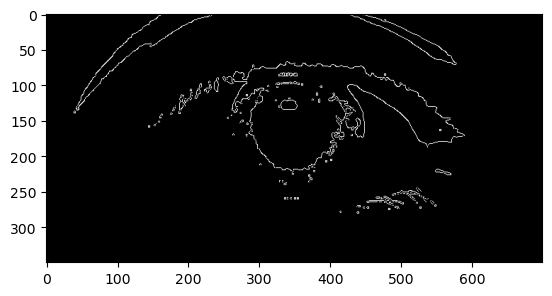

In [17]:
#Displays the Image as a Edge Map

scanPicture = cv2.imread(path,1) #parameter refers to file name.
gray = cv2.cvtColor(scanPicture, cv2.COLOR_BGR2GRAY)#converts to gray scale
binary = CannyEdge(gray, 90)#gets the edge mapping
plt.imshow(binary,cmap='gray') #displays it


In [18]:
def HoughCircleTransformation(minRad, maxRad): #function with parameters to reset minimum and maximum radius
    global scanPicture;
    global binary;
    scanPicture = cv2.imread(path,1); #resets the image
    
    #hough transformations
    rows = binary.shape[0]
    circles = cv2.HoughCircles(binary, cv2.HOUGH_GRADIENT, 1, rows / 8, param1=100, param2=30,minRadius=minRad,maxRadius=maxRad);
    
    #overlaps/draws the found circles on the eye(s)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(scanPicture, center, 5, (0, 0, 0), 3)
            # circle outline
            radius = i[2]
            cv2.circle(scanPicture, center, radius, (0, 0, 0), 3)
    
    #converts to an apprioate colour flag and returns the image
    hc_cv2 = cv2.cvtColor(scanPicture, cv2.COLOR_BGR2RGBA)     
    return hc_cv2     

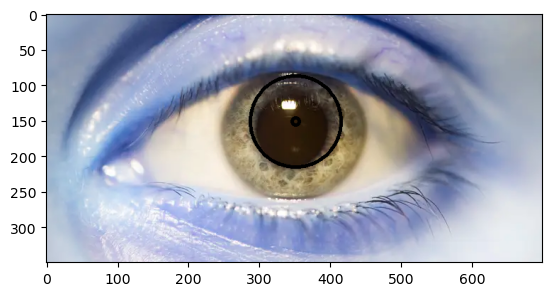

In [19]:
#TEST CODE
houghTransform = HoughCircleTransformation(50, 130);
img_plt = cv2.cvtColor(houghTransform, cv2.COLOR_BGR2RGBA)
plt.imshow(img_plt)

In [20]:
#GUI CODE

#sets up the window
window = Tk();
window.geometry("2500x1200");
filePath = '';


#Title Label
minSliderLabel = Label(window, text = "Finding Circles using Hough Transform", font='Helvetica 18 bold');
minSliderLabel.pack(anchor=tkinter.N, padx = (0,0), pady = (50, 0))


def upload_file():
    #file types
    global uploadImage
    global scanPicture;
    global filePath
    scanPicture.destroy();
    f_types = (('Jpg Files', '*.jpg'),('Jpeg Files', '*.jpeg'),('png Files', '*.PNG'), ('All files', '*.*')); #what files to accept
    filename = tkinter.filedialog.askopenfilename(filetypes = f_types) #opens the file dialogue to choose a file
    uploadImage = ImageTk.PhotoImage(file=filename) #gets the image
    filePath = os.path.abspath(filename); #gets the path of the image
    #print(str(filePath));
    scanPicture = tkinter.Label(image=uploadImage) #converts it to a tk.PhotoImage File
    scanPicture.image = uploadImage
    scanPicture.pack(anchor = tkinter.CENTER)  #adds it to the windows
    
#Slider Event Handlers
def SliderRadiusChange(event):

    global scanPicture;
    
    #destroys the previous image label
    scanPicture.destroy();
    img_cv2 = HoughCircleTransformation(int(minRadius.get()), int(maxRadius.get())); #calls the hough Transformation function
    imgPIL = PIL.Image.fromarray(img_cv2)                                  #converts the image to PIL
    imgtkinter = ImageTk.PhotoImage(image = imgPIL)                        #converts image to tk.PhotoImage
    scanPicture = tkinter.Label(image=imgtkinter)
    scanPicture.image = imgtkinter                                         #packs the image and displays it
    scanPicture.pack(anchor = tkinter.CENTER)
    
def CannyEdgeThresholdChange(event):
    global scanPicture;
    global filePath;
    global binary;
    img = cv2.imread(filePath,0) #parameter refers to file name.
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#converts to gray scale
    binary = CannyEdge(img, int(threshValue.get()))#gets the edge mapping
    scanPicture.destroy(); #destroys the previous label to display the new one.
    img_cv2 = HoughCircleTransformation(int(minRadius.get()), int(maxRadius.get())); #calls the hough Transformation function
    imgPIL = PIL.Image.fromarray(img_cv2)                                  #converts the image
    imgtkinter = ImageTk.PhotoImage(image = imgPIL)
    scanPicture = tkinter.Label(image=imgtkinter)
    scanPicture.image = imgtkinter                                         #packs the image and displays it
    scanPicture.pack(anchor = tkinter.CENTER)
    


#Slider
minRadius = IntVar();    #declaring the data types
maxRadius = IntVar();
threshValue = IntVar();

minSliderLabel = Label(window, text = "Minimum Radius"); #labels
minSliderLabel.pack(anchor=tkinter.E, padx = 100, pady = (50, 0)) #position
minSlider = Scale(window,orient = 'horizontal', from_=0,to=300 ,command = SliderRadiusChange, variable = minRadius) 
#what event handler it manages, and what variable it writes to.
#Creates Slider and adds it to window. 
minSlider.pack(anchor=tkinter.E, padx = 100, pady = (5, 20)) 

#same as above
maxSliderLabel = Label(window, text = "Maximum Radius");
maxSliderLabel.pack(anchor=tkinter.E, padx = 100)
maxSlider = Scale(window,orient = 'horizontal', from_=0,to=300 ,command = SliderRadiusChange, variable = maxRadius)                  #Creates Slider2
maxSlider.pack(anchor=tkinter.E, padx = 100, pady = (5, 20)) 

#same as above
cannySliderLabel = Label(window, text = "Canny Edge Threshold Value");
cannySliderLabel.pack(anchor=tkinter.E, padx = 100)
cannySlider = Scale(window,orient = 'horizontal', from_=1,to=254 ,command = CannyEdgeThresholdChange, variable = threshValue)                  #Creates Slider2
cannySlider.pack(anchor=tkinter.E, padx = 100, pady = (5, 20))

#button to upload image
uploadLabel = Label(window, text = "Press to Upload Image");
uploadButton = tkinter.Button(window, text='Upload File',command = lambda:upload_file()) #calls the method to get the file when pressed
uploadLabel.pack(anchor = tkinter.N);
uploadButton.pack(anchor = tkinter.N)


#Image Conversion & Displays the initial image on startup
imgPIL = PIL.Image.fromarray(houghTransform)
imgtkinter = ImageTk.PhotoImage(image = imgPIL)
scanPicture = tkinter.Label(image=imgtkinter)
scanPicture.image = imgtkinter
scanPicture.pack(anchor = tkinter.N)




window.mainloop();

In [10]:
'''
FlowChart
1. Import Libraries
2. Prompts the Users for an Image Input
3. Gets the Raw Image
4. Grayscale it and Binarize it
5. Create All Slider Listeners
6. If Slider Values are changed for Radius Values, call the Hough Transform Function with new Parameters
7. Overlap/Draw the Circles on the Original Image.
9. If Slider Values are changed for Canny Threshhold Values, call the Canny Edge Method with new Parameters
10. Recall the hough Transform & Overlap/Draw the Circles on the Original Image.

'''

'\nFlowChart\n1. Import Libraries\n2. Prompts the Users for an Image Input\n3. Gets the Raw Image\n4. Grayscale it and Binarize it\n5. Create All Slider Listeners\n6. If Slider Values are changed for Radius Values, call the Hough Transform Function with new Parameters\n7. Overlap/Draw the Circles on the Original Image.\n9. If Slider Values are changed for Canny Threshhold Values, call the Canny Edge Method with new Parameters\n10. Recall the hough Transform & Overlap/Draw the Circles on the Original Image.\n\n'

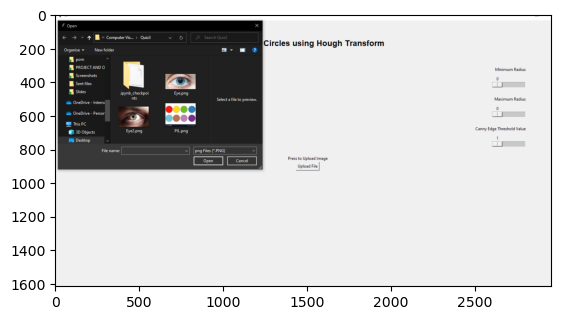

In [22]:
#plt.figure()
im1 = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/Proof1.PNG')
plt.imshow(im1);

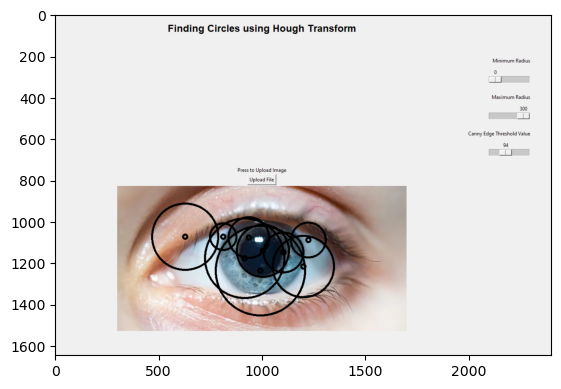

In [24]:
#plt.figure()
im2 = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/MaxRadius.PNG')
plt.imshow(im2);

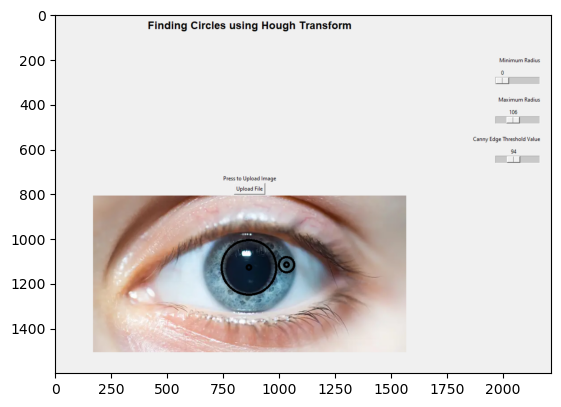

In [25]:
#plt.figure()
im3 = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/LowerRadius.PNG')
plt.imshow(im3);

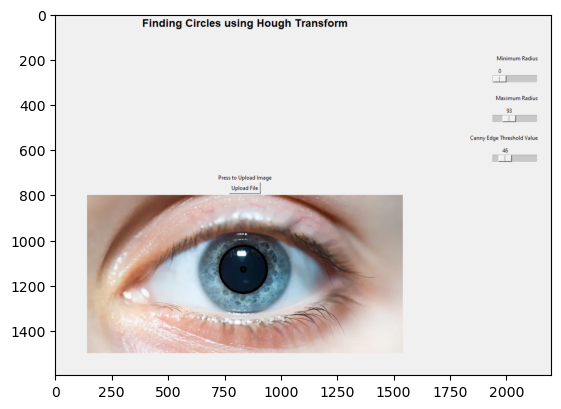

In [26]:
#plt.figure()
im4 = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/IdealRadius.PNG')
plt.imshow(im4);

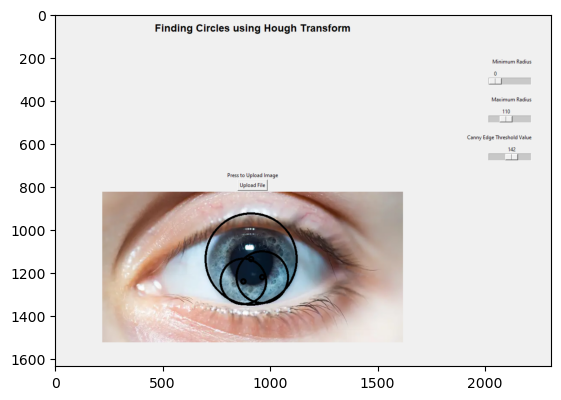

In [27]:
#plt.figure()
im5 = plt.imread('C:/Users/Aizat/Desktop/Computer Vision Work/Quiz3/DifferentThreshold.PNG')
plt.imshow(im5);